## Bibliotecas

In [ ]:
#!pip install wordcloud
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

# Definir o tema pastel no Seaborn
sns.set_palette("pastel") 

## Ingestão

In [3]:
df_medidas = pd.read_excel('./dados/BD_Disjuntores.xlsx', sheet_name='Documentos de Medida')

In [4]:
df_cadastro =  pd.read_excel('./dados/BD_Disjuntores.xlsx', sheet_name='Cadastro')
df = pd.merge(df_cadastro, df_medidas, how='left', on='Equipamento', )
df = df.dropna(subset=['LimInfIntMed.','LimSupIntMed.'], how='any')
df.head()

,Equipamento,Fabricante,Modelo,Dt.entr.serviço,Classe,Ano construção,Código ABC,Tensão,Tipo Instalação,Ponto medição,...,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,Txt.code codif.,Denominação,Texto
0,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,467488.0,...,2015-09-27,NaN,0.0,NaN,0.0,UN,2.0,Não,Comp/tes Elétricos-Instrum Risco de Avar,5
1,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758414.0,...,2024-03-08,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Elétricos-Instrum Risco de Avar,5
2,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758414.0,...,2021-11-24,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Elétricos-Instrum Risco de Avar,5
3,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758413.0,...,2024-03-08,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Mecânicos com Risco de Avaria,5
4,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758413.0,...,2021-11-24,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Mecânicos com Risco de Avaria,5


## Análise Exploratória

In [5]:
len(df_cadastro['Equipamento'].unique()), len(df_medidas['Equipamento'].unique())

(2827, 2663)

In [6]:
df_cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Equipamento      2827 non-null   int64         
 1   Fabricante       2827 non-null   object        
 2   Modelo           2810 non-null   object        
 3   Dt.entr.serviço  2826 non-null   datetime64[ns]
 4   Classe           2827 non-null   object        
 5   Ano construção   2827 non-null   int64         
 6   Código ABC       2827 non-null   object        
 7   Tensão           2827 non-null   float64       
 8   Tipo Instalação  2827 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 198.9+ KB


In [7]:
df2 = pd.merge(df_medidas, df_cadastro, how='left', on='Equipamento')
df2['Fabricante'].isna().any()

np.True_

In [8]:
df2[df2['Fabricante'].isna()].head()

,Equipamento,Ponto medição,Doc.medição,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,...,Denominação,Texto,Fabricante,Modelo,Dt.entr.serviço,Classe,Ano construção,Código ABC,Tensão,Tipo Instalação
18,467509,467492,732683,2015-09-27,1.0,0.0,1.0,0.29,%,NaN,...,Fator de Potencia Bucha B2 Fase A,Ensaio realizado 12/05/2009,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [9]:
del df2
del df_medidas, df_cadastro

In [38]:
df[['Tensão', 'Dt.entr.serviço', 'Ano construção', 'Data', 'Valor teórico', 'LimInfIntMed.', 'LimSupIntMed.', 'ValMed/PosTCont']].describe()

,Tensão,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont
count,143163.000000,142998,106362.000000,113232.000000,7.028700e+04,1.339640e+05
mean,219.044727,2021-09-23 16:52:43.009273088,2213.070112,1929.034940,1.077169e+06,5.542112e+07
min,6.600000,2002-03-06 00:00:00,-21.000000,-60.000000,-1.500000e+01,-6.000000e+01
25%,88.000000,2020-03-10 00:00:00,21.500000,0.000000,1.440000e+01,1.520000e+01
50%,138.000000,2022-06-20 00:00:00,47.000000,20.000000,4.000000e+01,4.000000e+01
75%,440.000000,2024-02-13 00:00:00,120.000000,85.000000,9.000000e+01,1.696000e+02
max,550.000000,2025-02-14 00:00:00,999999.000000,210000.000000,1.000000e+08,7.370000e+12
std,168.970734,NaN,17026.397748,13605.378764,1.032194e+07,2.013601e+10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143163 entries, 0 to 143162
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Equipamento      143163 non-null  int64         
 1   Fabricante       143163 non-null  object        
 2   Modelo           143146 non-null  object        
 3   Dt.entr.serviço  143144 non-null  datetime64[ns]
 4   Classe           143163 non-null  object        
 5   Ano construção   143163 non-null  int64         
 6   Código ABC       143163 non-null  object        
 7   Tensão           143163 non-null  float64       
 8   Tipo Instalação  143163 non-null  object        
 9   Ponto medição    142998 non-null  float64       
 10  Doc.medição      142998 non-null  float64       
 11  Data             142998 non-null  datetime64[ns]
 12  Valor teórico    106362 non-null  float64       
 13  LimInfIntMed.    113232 non-null  float64       
 14  LimSupIntMed.    702

In [12]:
df_gpd_equipamento = df.groupby('Equipamento').agg({
    'Ponto medição': 'nunique',
    'Data': 'nunique',
})
df_gpd_equipamento.head()

,Ponto medição,Data
Equipamento,,
127874,35,16
127875,18,7
127876,124,11
127878,31,11
127880,42,10


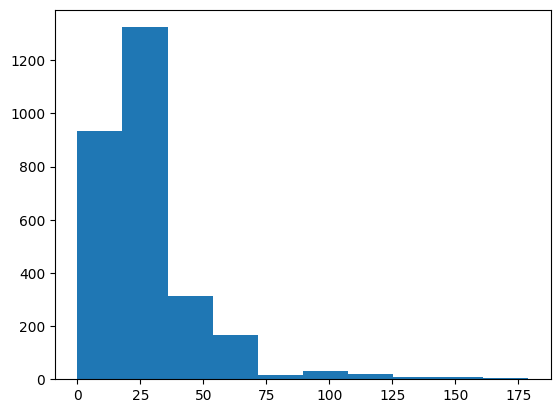

In [13]:
plt.hist(df_gpd_equipamento['Ponto medição'])
plt.show()

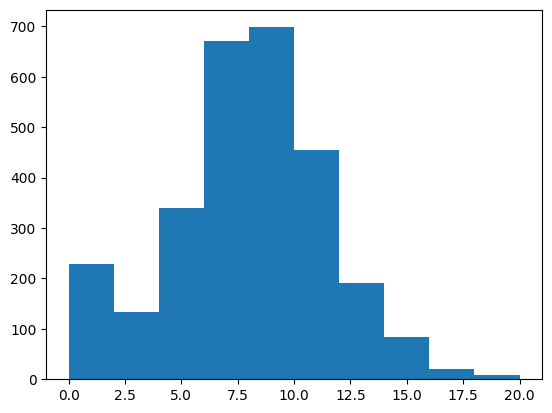

In [14]:
plt.hist(df_gpd_equipamento['Data'])
plt.show()

In [23]:
df_qualificacao = df[df['Denominação'] == 'Qualificacao do Equipamento']
len(df_qualificacao['Equipamento'].unique())

2618

In [25]:
df_qlfc_gpd = df_qualificacao[['Equipamento', 'Data']].groupby('Equipamento').nunique()
df_qlfc_gpd.describe()

,Data
count,2618.000000
mean,2.872040
std,0.430111
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


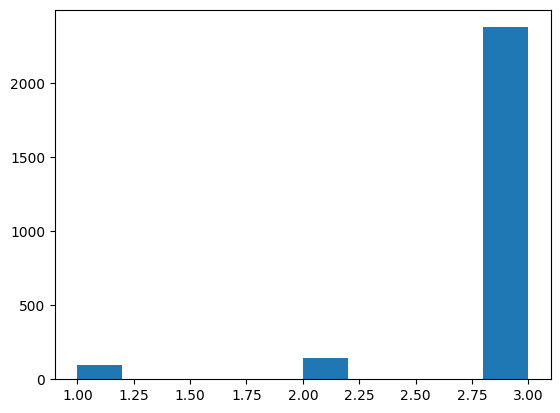

In [26]:
plt.hist(df_qlfc_gpd['Data'])
plt.show()

In [44]:
df_qlfc_gpd = df_qualificacao[['Equipamento', 'ValMed/PosTCont']].groupby('ValMed/PosTCont').nunique()
df_qlfc_gpd.describe()

,Equipamento
count,5.000000
mean,703.200000
std,581.576048
min,177.000000
25%,206.000000
50%,700.000000
75%,828.000000
max,1605.000000


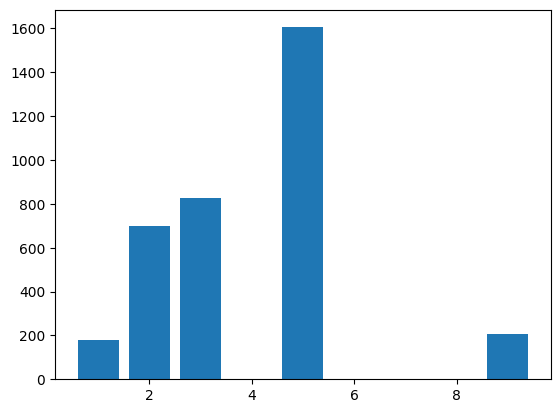

In [46]:
plt.bar(df_qlfc_gpd.index, df_qlfc_gpd['Equipamento'])
plt.show()

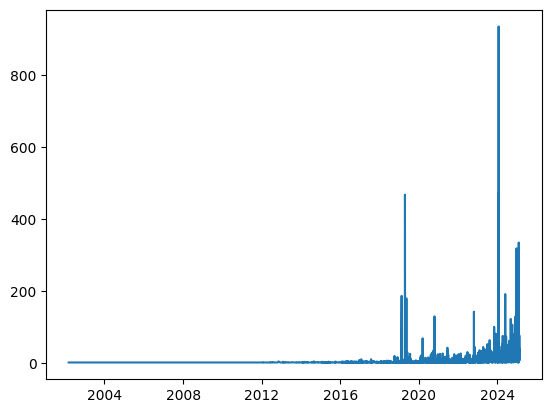

In [15]:
df_gpd_data = df.groupby('Data').agg({'Equipamento': 'nunique'})
plt.plot(df_gpd_data.index, df_gpd_data['Equipamento'])
plt.show()

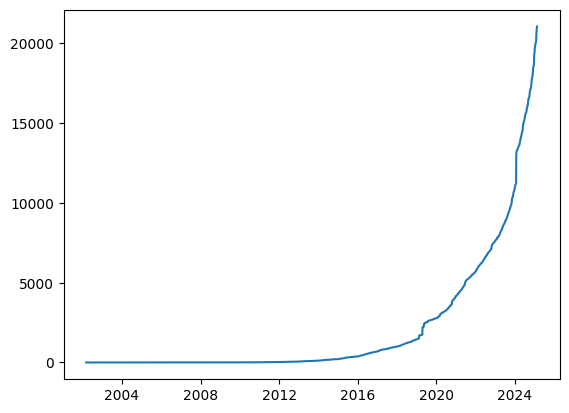

In [16]:
plt.plot(df_gpd_data.index, df_gpd_data['Equipamento'].cumsum())
plt.show()

In [17]:
df['Texto'].str.isnumeric().sum()

86255

In [20]:
df['Denominação'].unique()

array(['Comp/tes Elétricos-Instrum Risco de Avar',
       'Comp/tes Mecânicos com Risco de Avaria',
       'Contador de Curtos do Disjuntor', 'Contador de Operação Fase A',
       'Contador de Operação Fase B', 'Contador de Operação Fase V',
       'Contador de Operação Trifásico',
       'Corrente de Alimentação Motor Fase A',
       'Corrente de Alimentação Motor Fase B',
       'Corrente de Alimentação Motor Fase V',
       'Qualificacao do Equipamento',
       'Resistencia Contatos Camara 1 Fase A',
       'Resistencia Contatos Camara 1 Fase B',
       'Resistencia Contatos Camara 1 Fase V', 'Severidade Termografica',
       'Tempo de Abertura Camara 1 Fase A',
       'Tempo de Abertura Camara 1 Fase B',
       'Tempo de Abertura Camara 1 Fase V',
       'Tempo de Fechamento Camara 1 Fase A',
       'Tempo de Fechamento Camara 1 Fase B',
       'Tempo de Fechamento Camara 1 Fase V',
       'Vazamento Óleo Amortecedor', 'Vazamento SF6',
       'Resist Isol Aberto Cam 1-A cont inf/ca

In [39]:
len(df['Denominação'].unique())

354

In [27]:
df['Texto'].unique()

array(['5', 'Fechamento mensal ref. 01/2025',
       'Fechamento mensal referente 12/24', ...,
       'N1- 193342 - 11.06.2012', 'N1- 552751 - 14.09.2017',
       'PREENCHER PTOS OBRIG'], shape=(1030,), dtype=object)

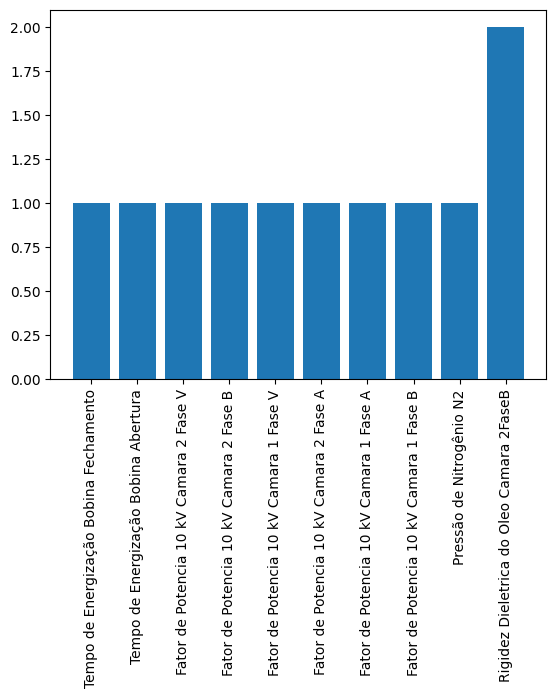

In [35]:
df_den_gpd = df[['Denominação', 'Doc.medição']].groupby('Denominação').nunique().sort_values('Doc.medição')
plt.bar(df_den_gpd.index[:10], df_den_gpd.iloc[:10, 0])
plt.xticks(rotation=90)
plt.show()

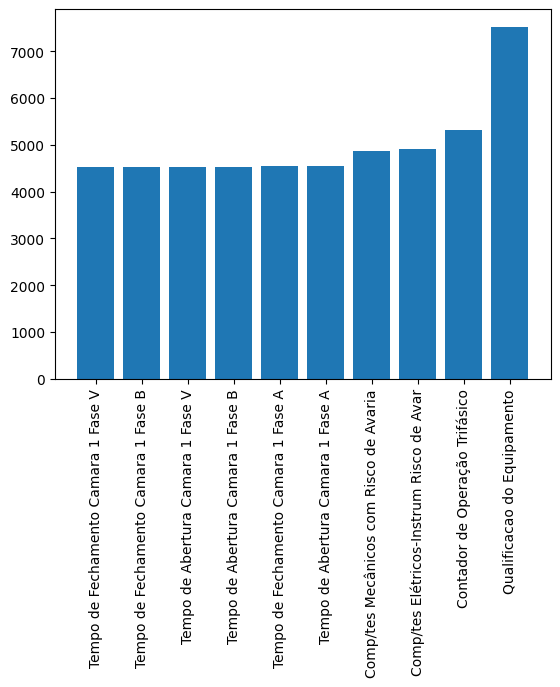

In [37]:
plt.bar(df_den_gpd.index[-10:], df_den_gpd.iloc[-10:, 0])
plt.xticks(rotation=90)
plt.show()

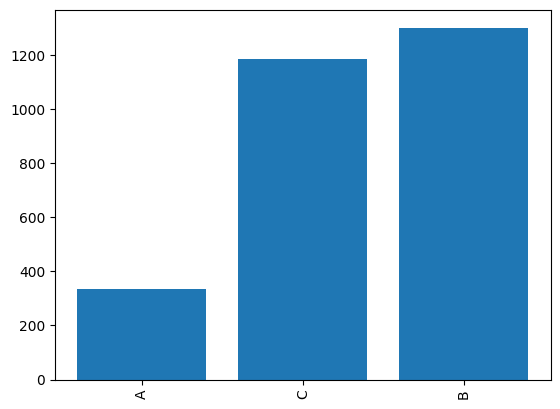

In [41]:
df_crit_gpd = df[['Código ABC', 'Equipamento']].groupby('Código ABC').nunique().sort_values('Equipamento')
plt.bar(df_crit_gpd.index, df_crit_gpd['Equipamento'])
plt.xticks(rotation=90)
plt.show()